In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh  
import seaborn as sn
from sklearn import decomposition
from sklearn.manifold import TSNE

In [2]:
d0 = pd.read_csv('C:/Users/HP/Desktop/ml/train.csv')

In [3]:
label = d0['label']
data = d0.drop('label', axis = 1)

In [4]:
#label = l.head(45000)
#data = d.head(45000)

In [5]:
#standardization of data
standardised_data = StandardScaler().fit_transform(data)

In [6]:
#data visualization using pca using scipy.linalg
sample_data = standardised_data
covar_matrix = np.matmul(sample_data.T, sample_data)
values, vectors = eigh(covar_matrix, eigvals = (782, 783))
new_coordinates = np.matmul(vectors.T, sample_data.T)
new_coordinates = np.vstack((new_coordinates, label)).T
df = pd.DataFrame(data = new_coordinates, columns = ("PC1", "PC2", "label"))

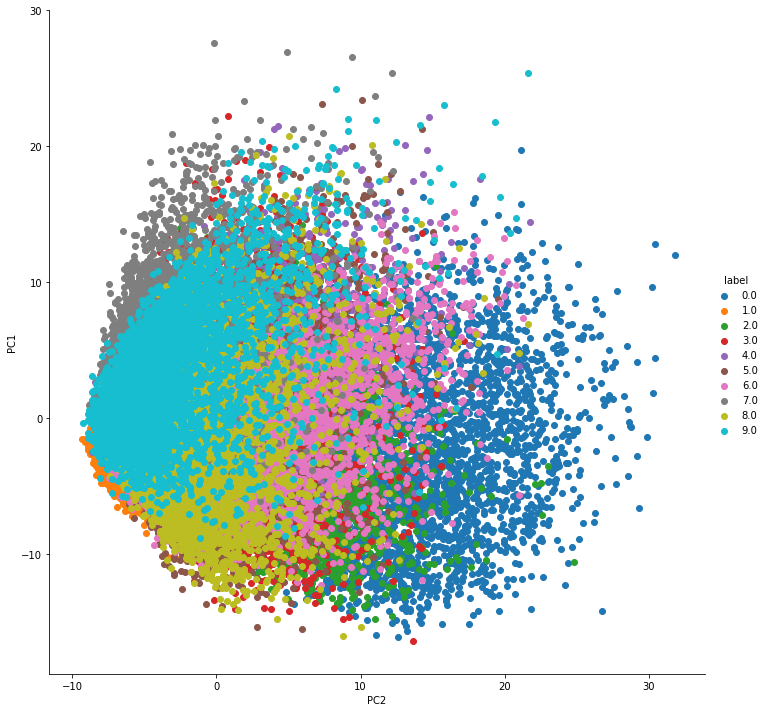

In [7]:
#plotting(scatter plot)
sn.FacetGrid(df, hue = 'label', height = 10,aspect = 1).map(plt.scatter, 'PC2', 'PC1').add_legend()

In [8]:
#data visualisation using pca
sample_data = standardised_data
pca = decomposition.PCA(2)

In [9]:
#pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

In [10]:
pca_data.shape


(42000, 2)

In [11]:
pca_data = np.vstack((pca_data.T, label)).T

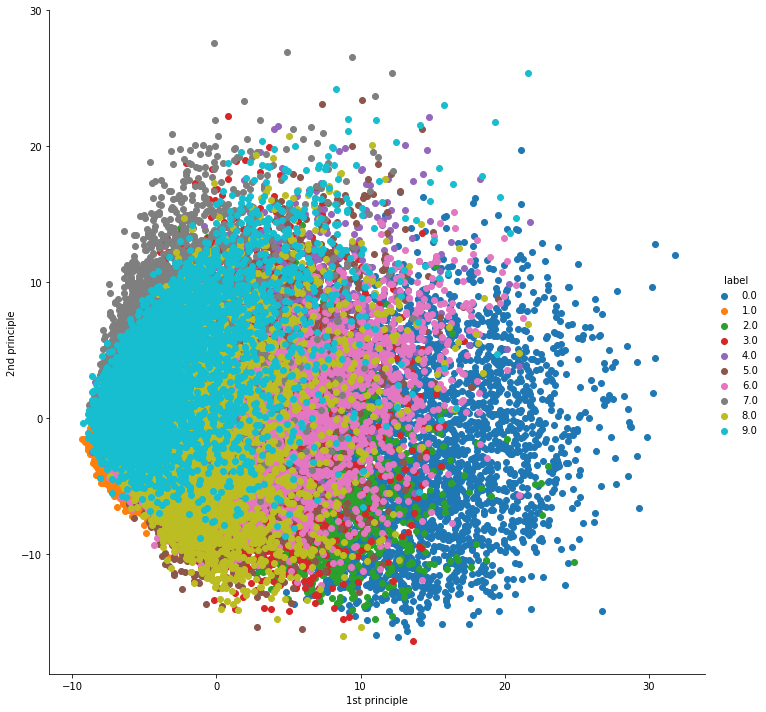

In [12]:
pca_df = pd.DataFrame(data = pca_data, columns= ("1st principle", "2nd principle", "label"))
sn.FacetGrid(pca_df, hue = 'label', height = 10,aspect = 1).map(plt.scatter, '1st principle', '2nd principle').add_legend()
plt.show()

In [13]:
#dimensionality reduction using pca
#pca.n_components = 784
sample_data = standardised_data
pca1 = decomposition.PCA()
pca_data1 = pca1.fit_transform(sample_data)


In [14]:
pca1.n_components

In [15]:
percent_var_explained = pca1.explained_variance_ / np.sum(pca1.explained_variance_)


In [16]:
cum_var_explained = np.cumsum(percent_var_explained)

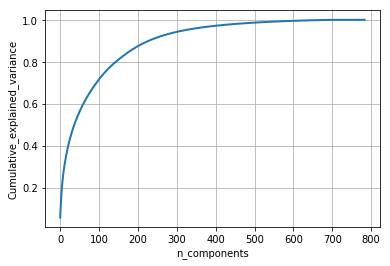

In [17]:
plt.figure(1, figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()
#it is observable that just 400 features can explain 99% of the variance

In [18]:
#data visualization using t-SNE
sample_data = standardised_data
TSNE.N_components = 2
# TSNE.perplexity = 30 #default
# TSNE.learning_rate = 200 #default
# TSNE.n_iter = 1000 #default for the optimization
TSNE.random_state = 0
model = TSNE()
tSNE_data = model.fit_transform(sample_data)

In [19]:
tSNE_data = np.vstack((tSNE_data.T, label)).T

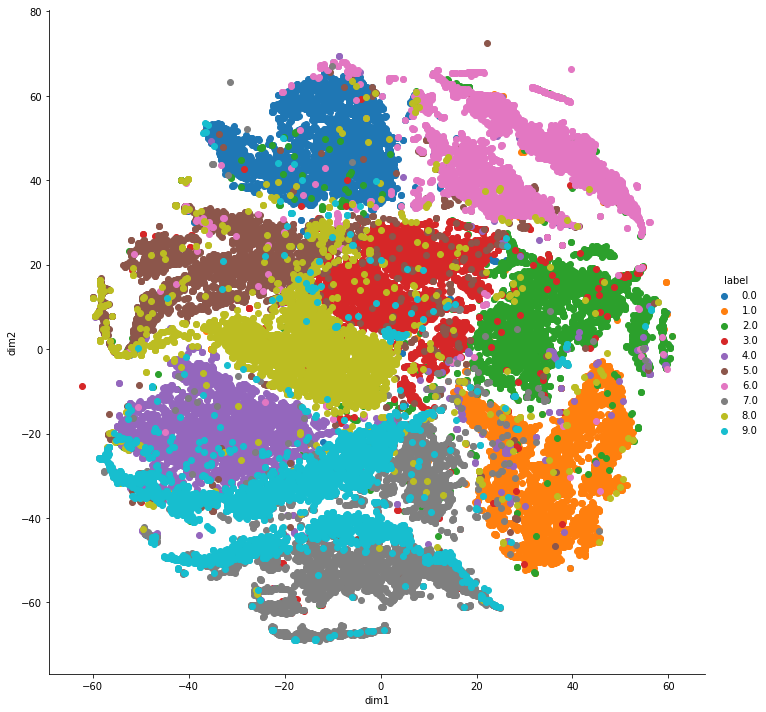

In [20]:
tSNE_df = pd.DataFrame(data = tSNE_data, columns = ("dim1", "dim2", "label"))
sn.FacetGrid(tSNE_df, hue = "label", height = 10,aspect = 1).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()

In [21]:
#data visualization using t-SNE
sample_data = standardised_data
TSNE.N_components = 2
TSNE.perplexity = 50 
# TSNE.learning_rate = 200 #default
# TSNE.n_iter = 1000 #default for the optimization
TSNE.random_state = 0
model = TSNE()
tSNE_data = model.fit_transform(sample_data)

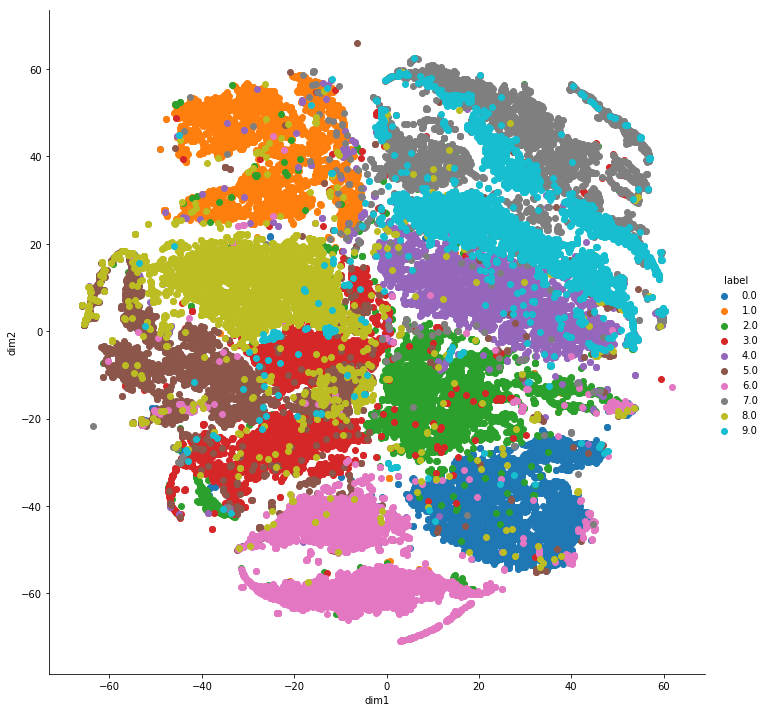

In [22]:
tSNE_data = np.vstack((tSNE_data.T, label)).T
tSNE_df = pd.DataFrame(data = tSNE_data, columns = ("dim1", "dim2", "label"))
sn.FacetGrid(tSNE_df, hue = "label", height = 10,aspect = 1).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()
#results show that the value 50 for perplexity is as better as 30

In [23]:
#perplexity value 100
sample_data = standardised_data
TSNE.N_components = 2
TSNE.perplexity = 100
# TSNE.learning_rate = 200 #default
# TSNE.n_iter = 1000 #default for the optimization
TSNE.random_state = 0
model = TSNE()
tSNE_data = model.fit_transform(sample_data)

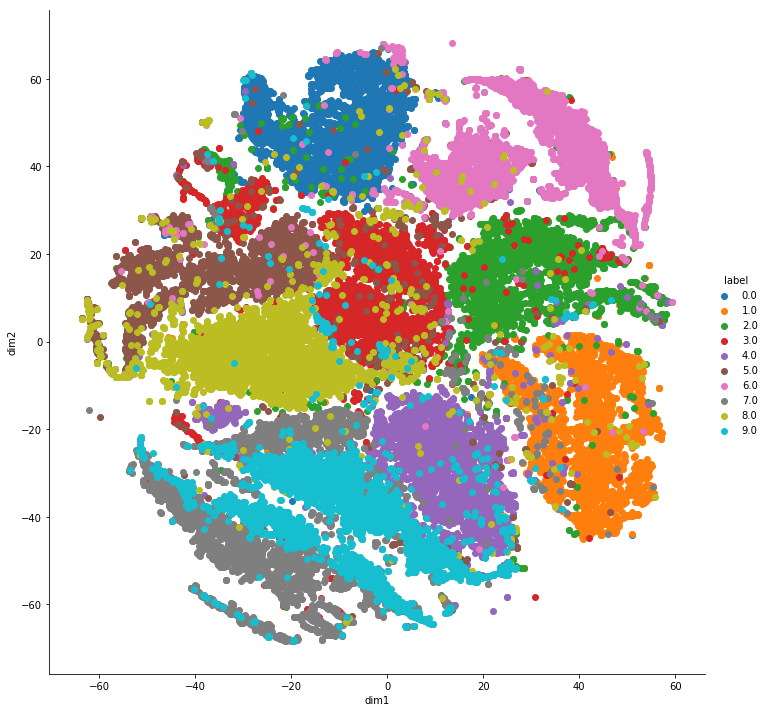

In [24]:
tSNE_data = np.vstack((tSNE_data.T, label)).T
tSNE_df = pd.DataFrame(data = tSNE_data, columns = ("dim1", "dim2", "label"))
sn.FacetGrid(tSNE_df, hue = 'label', height = 10,aspect = 1).map(plt.scatter,'dim1', 'dim2').add_legend()
plt.show()

In [25]:
#perplexity value 15
sample_data = standardised_data
TSNE.N_components = 2
TSNE.perplexity = 15
TSNE.random_state = 0 #rest of the values are default
model = TSNE()
tSNE_data = model.fit_transform(sample_data)

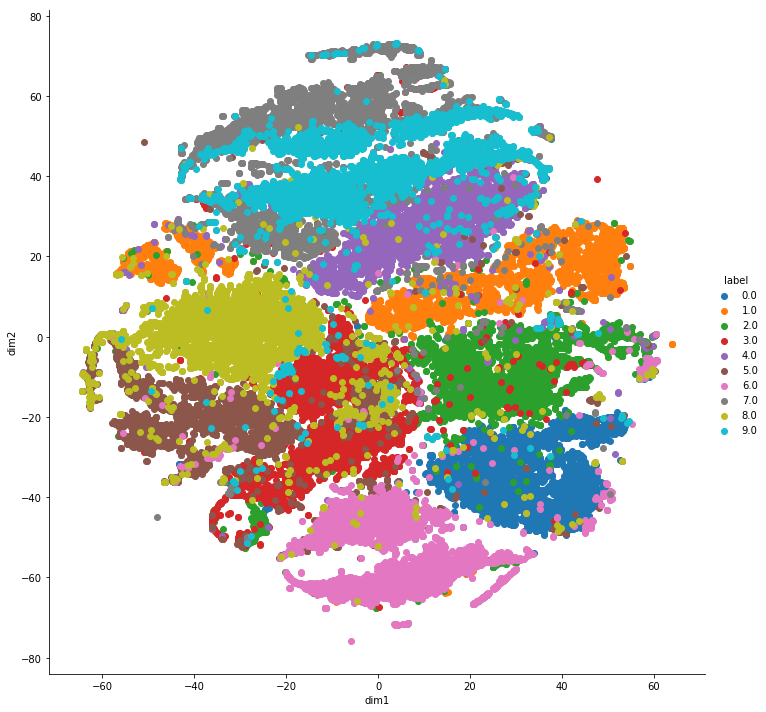

In [26]:
#visualization
tSNE_data = np.vstack((tSNE_data.T, label)).T
tSNE_df = pd.DataFrame(data = tSNE_data, columns = ("dim1", "dim2", "label"))
sn.FacetGrid(tSNE_df, hue = 'label', height = 10,aspect = 1).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()
#though the best choice of perplexity is 30, although values in the range 15 to 50 are good for visualizing MNIST data

In [27]:
#now we will change the umber of iteration
#data visualization using t-SNE
TSNE.N_components = 2
#TSNE.perplexity = 30 #default
# TSNE.learning_rate = 200 #default
TSNE.n_iter = 5000 #modified value
TSNE.random_state = 0
model = TSNE()
tSNE_data = model.fit_transform(standardised_data)

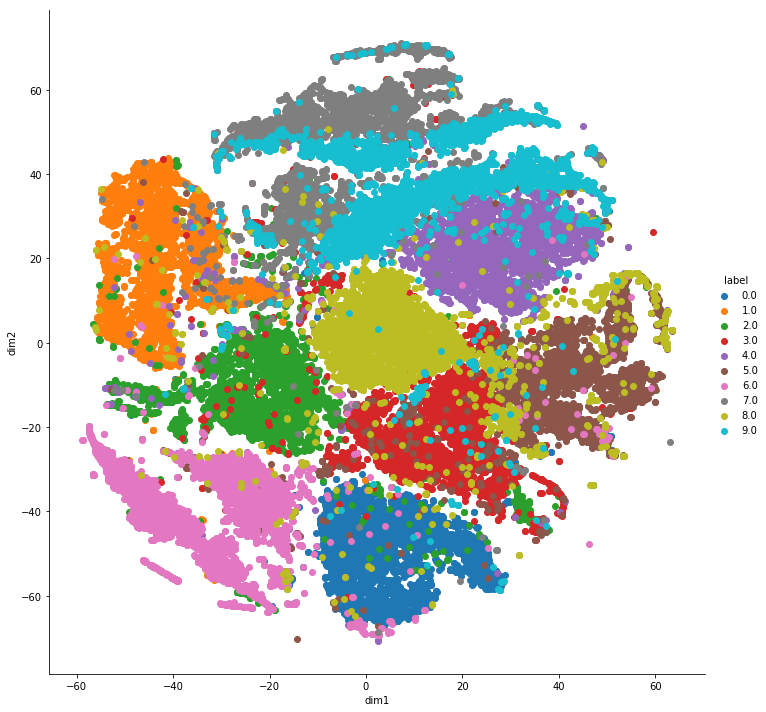

In [28]:
tSNE_data = np.vstack((tSNE_data.T, label)).T
tSNE_df = pd.DataFrame(data = tSNE_data, columns = ("dim1", "dim2", "label"))
sn.FacetGrid(tSNE_df, hue = "label",height = 10,aspect = 1).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()
#results show that the value 5000 for number of iteration is as better as 1000

In [29]:
#number of iteration = 10000
sample_data = standardised_data
model = TSNE(n_components = 2, n_iter = 10000, random_state = 0)
tSNE_data = model.fit_transform(sample_data)

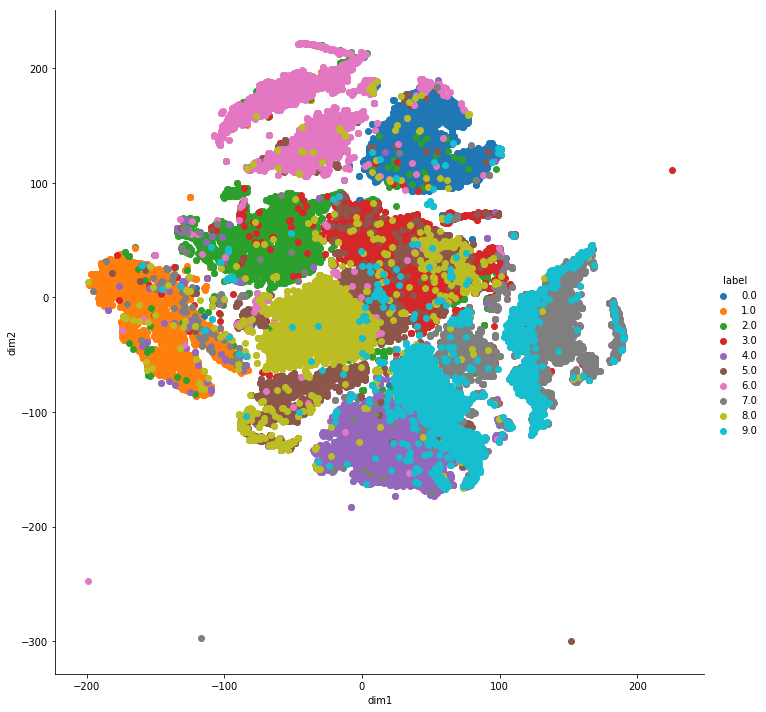

In [30]:
tSNE_data = np.vstack((tSNE_data.T, label)).T
tSNE_df = pd.DataFrame(data = tSNE_data, columns = ("dim1", "dim2", "label"))
sn.FacetGrid(tSNE_df, hue= 'label',height = 10,aspect = 1).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()
#increasing the number of iteration to 10 times has given improved results for visualization 
#and now it seems to have attained a stable shape
#results show that greater the number of iteration better the visualization is